In [14]:
import pandas as pd
import tgb as tgb

In [16]:
from tgb.nodeproppred.dataset import NodePropPredDataset

name = "tgbn-genre"

dataset = NodePropPredDataset(name=name, root="datasets", preprocess=True)

data = dataset.full_data

Download started, this might take a while . . . 
Dataset title: tgbn-genre
Download completed 
Dataset directory is  /Users/ishikaghosh/anaconda3/envs/erdos_may_2024/lib/python3.11/site-packages/tgb/datasets/tgbn_genre
file not processed, generating processed file
number of lines counted 17858395


17858396it [00:37, 471275.43it/s]
2741936it [00:04, 656006.81it/s]


file processed and saved


In [19]:
data['edge_feat']= [x for xs in data['edge_feat'] for x in xs]
df= pd.DataFrame.from_dict(data, orient='columns')

In [21]:
df.head()

,sources,destinations,timestamps,edge_idxs,edge_feat,edge_label
0,513.0,0.0,1.108357e+09,1.0,0.375000,1.0
1,513.0,0.0,1.108357e+09,2.0,0.375000,1.0
2,514.0,1.0,1.108357e+09,3.0,0.452489,1.0
3,514.0,2.0,1.108357e+09,4.0,0.289593,1.0
4,514.0,3.0,1.108357e+09,5.0,0.257919,1.0


In [44]:
df.head()

,sources,destinations,timestamps,edge_idxs,edge_feat,edge_label
0,513.0,0.0,1.108357e+09,1.0,0.375000,1.0
1,513.0,0.0,1.108357e+09,2.0,0.375000,1.0
2,514.0,1.0,1.108357e+09,3.0,0.452489,1.0
3,514.0,2.0,1.108357e+09,4.0,0.289593,1.0
4,514.0,3.0,1.108357e+09,5.0,0.257919,1.0


In [49]:
df[df['sources'] == 937]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Axes: >

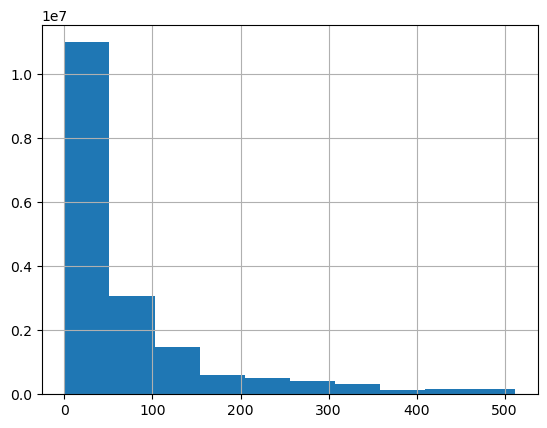

In [53]:
df['destinations'].hist()

<Axes: >

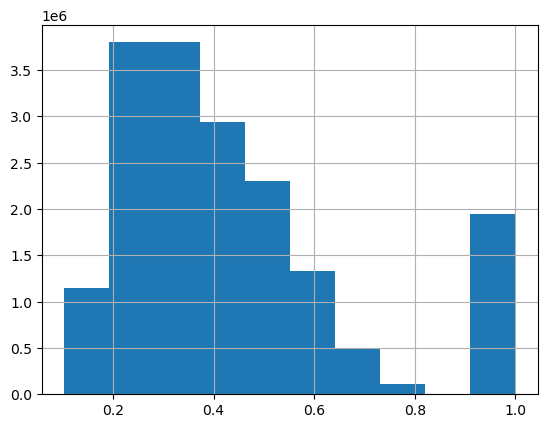

In [55]:
df['edge_feat'].hist()

In [57]:
from sklearn.decomposition import PCA